<center><h3>Development of Machine Learning Model for Diagnostic Disease Prediction based on Laboratory Test</h3></center>

### Importing Modules

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [7]:
df = pd.read_csv('laboratory_data.csv')
df.head()

,Gender,Age,Hemoglobin,RBC,WBC,AST (aspartate aminotransferase),ALT (alanine aminotransferase),Cholestrol,Spirometry,Creatinine,Glucose,Lipase,Troponin,Disease
0,Male,59,6,1.20,6220,26,22,227,4.75,0.90,96,97,0.02,Anemia
1,Male,71,40,20.00,6636,18,27,220,3.93,1.03,94,82,0.04,Asthma
2,Female,22,14,3.55,18314,21,30,224,3.93,1.17,70,101,0.00,Infection
3,Male,53,16,4.95,9931,45,62,205,3.58,0.81,82,108,0.03,Liver Disease
4,Male,77,16,3.96,7088,29,25,217,3.20,1.70,97,107,0.04,Liver Disease


In [8]:
df.tail()

,Gender,Age,Hemoglobin,RBC,WBC,AST (aspartate aminotransferase),ALT (alanine aminotransferase),Cholestrol,Spirometry,Creatinine,Glucose,Lipase,Troponin,Disease
12004,Female,51,16,5.07,8724,16,32,212,4.57,0.87,85,94,0.06,Heart attack
12005,Male,33,14,4.44,6893,19,31,229,4.22,1.71,76,107,0.00,Kidney Disease
12006,Female,33,16,4.99,6863,15,32,208,3.68,1.11,138,78,0.02,Diabetics
12007,Male,75,3,1.01,9514,24,32,207,3.39,0.90,71,73,0.00,Anemia
12008,Female,35,3,0.62,8001,28,24,206,4.80,1.13,94,118,0.01,Anemia


### Understanding the Data

In [9]:
df.shape

(12009, 14)

In [10]:
df.columns

Index(['Gender', 'Age', 'Hemoglobin', 'RBC', 'WBC',
       'AST (aspartate aminotransferase)', 'ALT (alanine aminotransferase)',
       'Cholestrol', 'Spirometry', 'Creatinine', 'Glucose', 'Lipase',
       'Troponin', 'Disease '],
      dtype='object')

In [11]:
df.isna().sum()

Gender                              0
Age                                 0
Hemoglobin                          0
RBC                                 0
WBC                                 0
AST (aspartate aminotransferase)    0
ALT (alanine aminotransferase)      0
Cholestrol                          0
Spirometry                          0
Creatinine                          0
Glucose                             0
Lipase                              0
Troponin                            0
Disease                             0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12009 entries, 0 to 12008
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            12009 non-null  object 
 1   Age                               12009 non-null  int64  
 2   Hemoglobin                        12009 non-null  int64  
 3   RBC                               12009 non-null  float64
 4   WBC                               12009 non-null  int64  
 5   AST (aspartate aminotransferase)  12009 non-null  int64  
 6   ALT (alanine aminotransferase)    12009 non-null  int64  
 7   Cholestrol                        12009 non-null  int64  
 8   Spirometry                        12009 non-null  float64
 9   Creatinine                        12009 non-null  float64
 10  Glucose                           12009 non-null  int64  
 11  Lipase                            12009 non-null  int64  
 12  Trop

In [15]:
df.describe()

,Age,Hemoglobin,RBC,WBC,AST (aspartate aminotransferase),ALT (alanine aminotransferase),Cholestrol,Spirometry,Creatinine,Glucose,Lipase,Troponin
count,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000
mean,54.415438,11.988342,3.421939,9154.022317,24.613457,31.168873,217.975685,3.798141,1.099124,90.801815,101.816554,0.027720
std,21.160408,4.681409,1.925999,3922.574987,8.150145,11.565622,13.956727,0.887210,0.295349,18.361879,27.901340,0.023478
min,18.000000,2.000000,0.110000,6005.000000,15.000000,20.000000,200.000000,1.010000,0.800000,70.000000,70.000000,0.000000
25%,36.000000,6.000000,1.120000,7061.000000,19.000000,24.000000,208.000000,3.390000,0.910000,78.000000,83.000000,0.010000
50%,55.000000,14.000000,4.000000,8187.000000,23.000000,28.000000,216.000000,3.940000,1.030000,87.000000,97.000000,0.020000
75%,73.000000,15.000000,4.530000,9207.000000,28.000000,33.000000,224.000000,4.440000,1.140000,96.000000,110.000000,0.030000
max,90.000000,50.000000,34.000000,27901.000000,50.000000,70.000000,281.000000,5.010000,2.000000,157.000000,202.000000,0.100000


In [16]:
df.describe(include='object')

,Gender,Disease
count,12009,12009
unique,2,9
top,Female,Anemia
freq,6209,2979


### Exploratory Data Analysis

#### Univariate Analysis

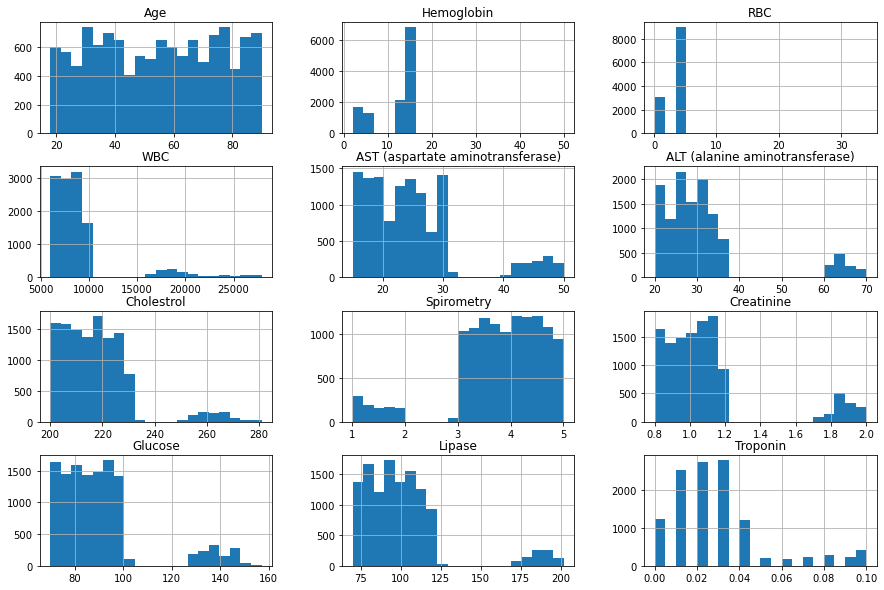

In [17]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

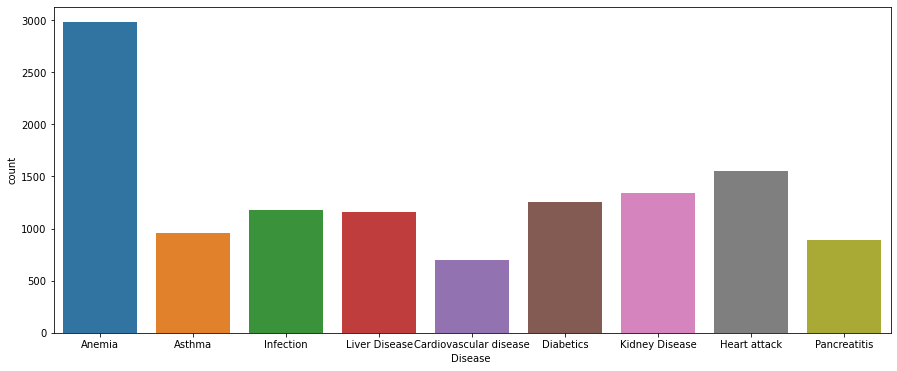

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Disease ', data=df)
plt.show()

#### Multivariate Analysis

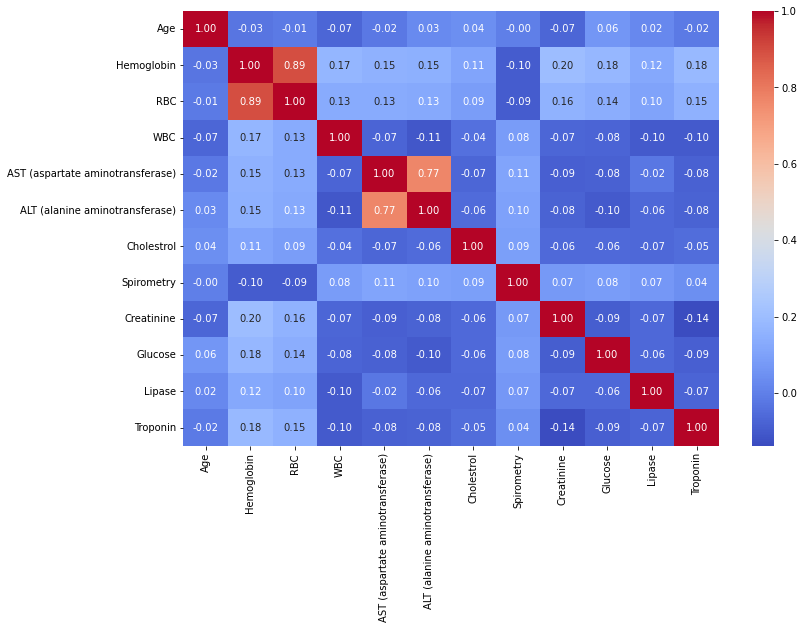

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

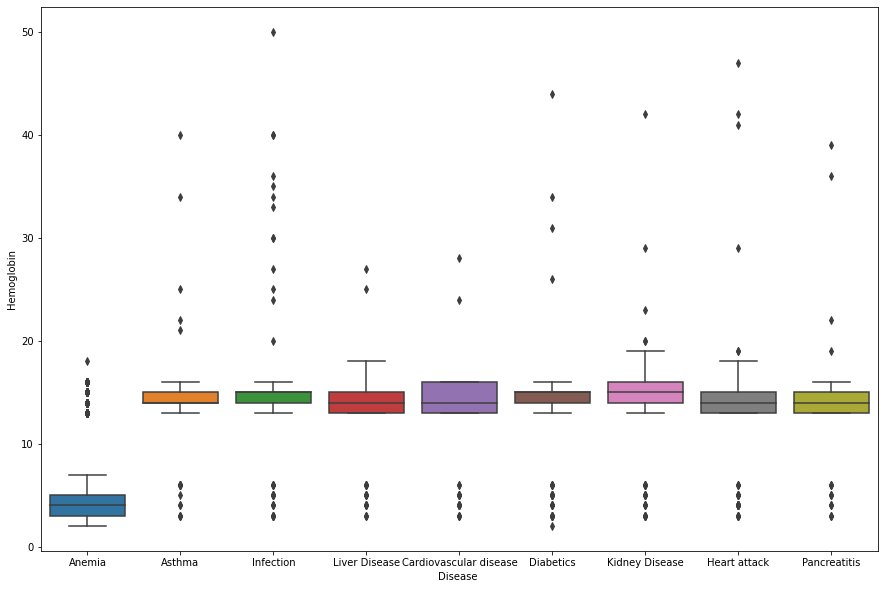

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Disease ', y='Hemoglobin', data=df)
plt.show()

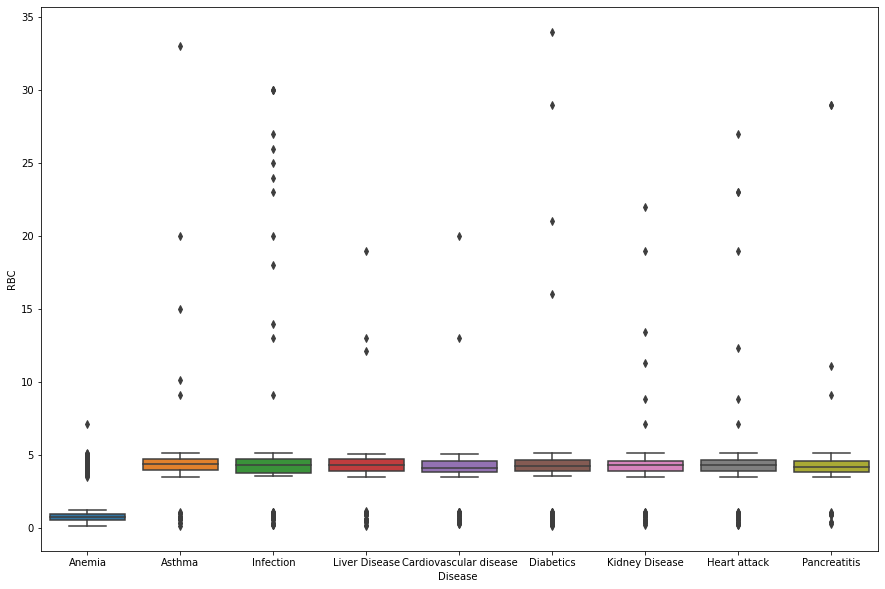

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Disease ', y='RBC', data=df)
plt.show()

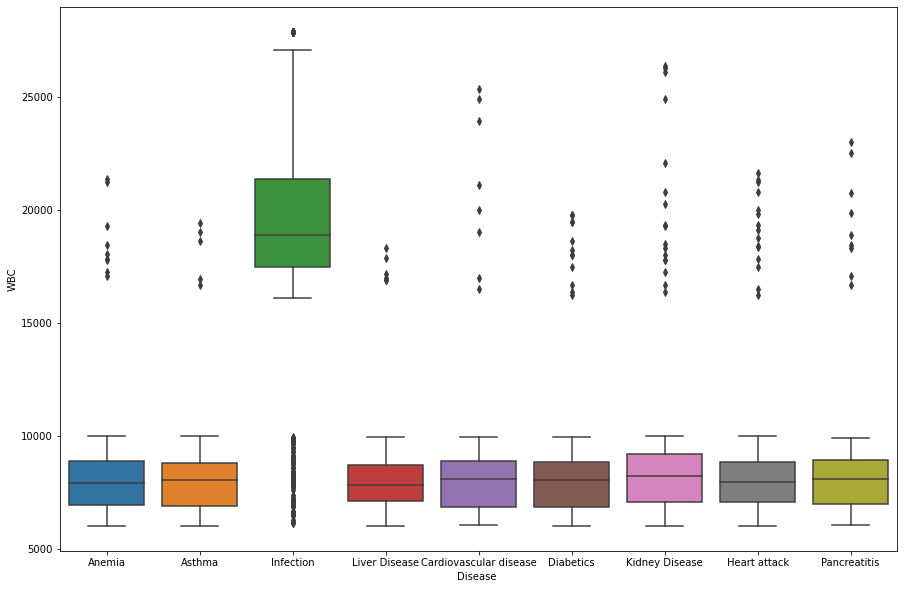

In [22]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Disease ', y='WBC', data=df)
plt.show()

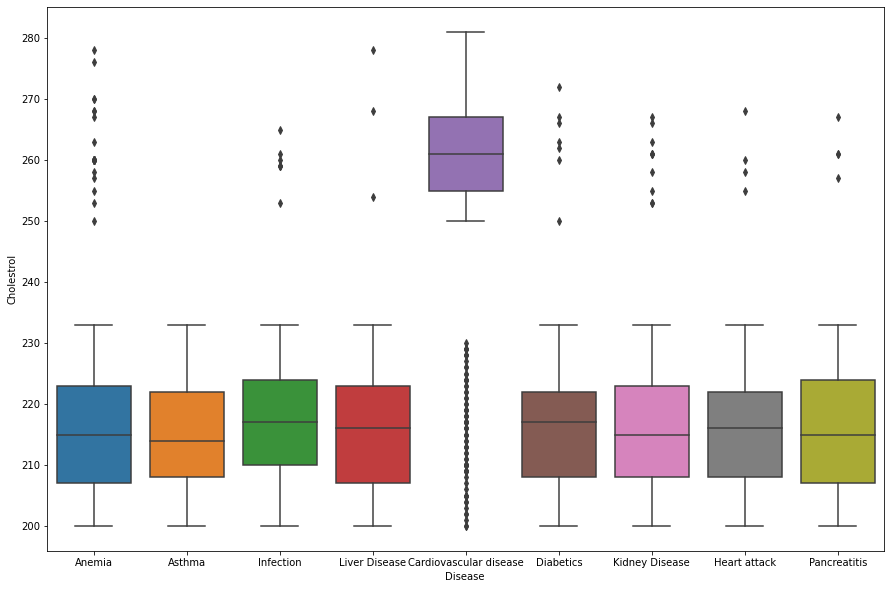

In [23]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Disease ', y='Cholestrol', data=df)
plt.show()

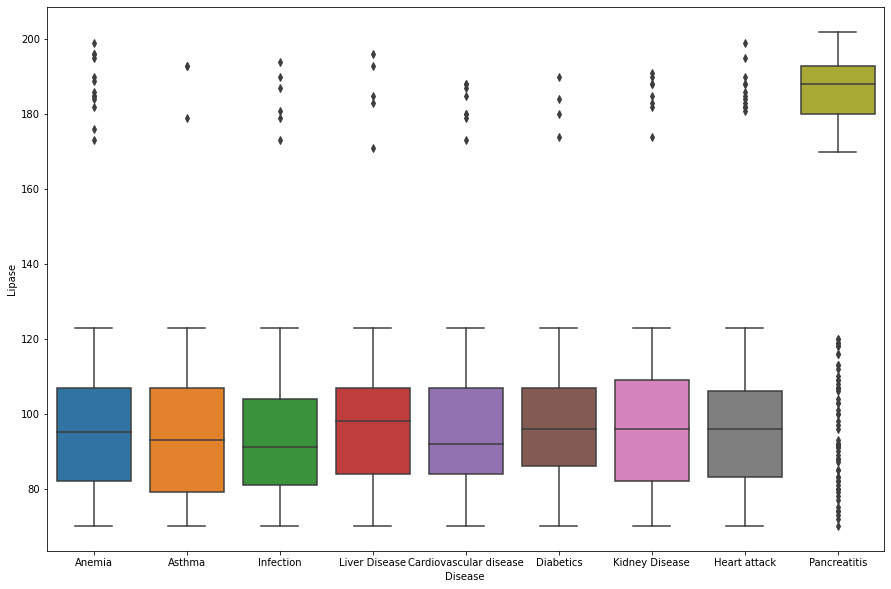

In [24]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Disease ', y='Lipase', data=df)
plt.show()

### Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [26]:
df['Gender'] = le.fit_transform(df['Gender'])

In [27]:
df['Disease '] = le.fit_transform(df['Disease '])

In [28]:
category_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Category Mapping:")
for category, encoded_value in category_mapping.items():
    print(f"{category}: {encoded_value}")

Category Mapping:
Anemia: 0
Asthma: 1
Cardiovascular disease: 2
Diabetics: 3
Heart attack: 4
Infection: 5
Kidney Disease: 6
Liver Disease: 7
Pancreatitis: 8


### Defining Independent and Dependent Variables

In [29]:
x = df.values[:,:13]

In [30]:
y = df.values[:,13]

### Splitting the Data for Training and Testing

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [32]:
print("Total length of the dataset: ",len(df))
print("Total length of training data: ",len(X_train))
print("Total length of testing data: ",len(X_test))

Total length of the dataset:  12009
Total length of training data:  9607
Total length of testing data:  2402


### Machine Learning Model Selection

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

pred= rf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

#print("Accuracy for Random Forest: ", accuracy_score(y_test, pred)*100)

In [35]:

confusion_matrix(y_test, pred)

array([[458,  16,  12,  22,  21,  11,  26,  13,   6],
       [  2, 142,   2,   5,   5,   6,   4,   6,   8],
       [  8,   2, 101,   8,   8,   1,   6,   2,   2],
       [ 16,  10,   0, 179,  17,   6,   6,  10,   9],
       [ 19,   5,   9,   7, 230,   6,   9,   6,   8],
       [ 10,   8,   9,   7,  19, 169,  19,   4,   8],
       [ 19,   5,  14,  13,  17,   6, 182,   8,   8],
       [ 15,   4,   1,   5,   2,   1,   6, 202,   9],
       [ 11,   2,   2,   5,   8,   3,   2,   3, 141]], dtype=int64)

In [39]:
from xgboost import XGBClassifier

In [40]:
xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

In [41]:
print("Accuracy for XGB Classifier: ", accuracy_score(y_test, pred)*100)

Accuracy for XGB Classifier:  93.08909242298084


In [46]:
confusion_matrix(y_test, pred)

array([[559,   5,   3,   3,   6,   0,   5,   2,   2],
       [  1, 171,   0,   2,   1,   1,   4,   0,   0],
       [  3,   2, 121,   2,   2,   2,   1,   2,   3],
       [  6,   1,   0, 237,   4,   1,   2,   2,   0],
       [  7,   0,   1,   2, 276,   5,   4,   2,   2],
       [  8,   3,   4,   1,   8, 224,   3,   0,   2],
       [  2,   0,   1,   2,   5,   3, 254,   3,   2],
       [  6,   2,   1,   1,   0,   1,   2, 231,   1],
       [  3,   0,   2,   3,   2,   3,   0,   1, 163]], dtype=int64)

In [47]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state = 42)

lgbm.fit(X_train, y_train)

pred = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 9607, number of used features: 13
[LightGBM] [Info] Start training from score -1.389526
[LightGBM] [Info] Start training from score -2.517384
[LightGBM] [Info] Start training from score -2.844098
[LightGBM] [Info] Start training from score -2.264494
[LightGBM] [Info] Start training from score -2.034560
[LightGBM] [Info] Start training from score -2.342618
[LightGBM] [Info] Start training from score -2.195768
[LightGBM] [Info] Start training from score -2.349140
[LightGBM] [Info] Start training from score -2.596567


In [48]:
print("Accuracy for LGBM Classifier: ", accuracy_score(y_test, pred)*100)

Accuracy for LGBM Classifier:  92.4646128226478


In [49]:
confusion_matrix(y_test, pred)

array([[559,   5,   3,   3,   6,   0,   5,   2,   2],
       [  1, 171,   0,   2,   1,   1,   4,   0,   0],
       [  3,   2, 121,   1,   2,   3,   1,   2,   3],
       [  6,   6,   0, 232,   4,   1,   2,   2,   0],
       [  7,   0,   1,   2, 271,   5,   9,   2,   2],
       [  8,   3,   4,   1,   8, 225,   2,   0,   2],
       [  2,   0,   1,   2,   5,   3, 254,   3,   2],
       [  8,   2,   1,   1,   0,   1,   2, 229,   1],
       [  7,   1,   2,   2,   2,   3,   0,   1, 159]], dtype=int64)

In [50]:
from sklearn.ensemble import VotingClassifier

rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)
voting_classifier = VotingClassifier(
    estimators=[
        ('random_forest', rf_model),
        ('xgboost', xgb_model),
        ('lightgbm', lgbm_model)
    ],
    voting='soft'
)

In [51]:
voting_classifier.fit(X_train, y_train)

predictions = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)*100
print(f"Ensemble Model Accuracy: {accuracy}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 9607, number of used features: 13
[LightGBM] [Info] Start training from score -1.389526
[LightGBM] [Info] Start training from score -2.517384
[LightGBM] [Info] Start training from score -2.844098
[LightGBM] [Info] Start training from score -2.264494
[LightGBM] [Info] Start training from score -2.034560
[LightGBM] [Info] Start training from score -2.342618
[LightGBM] [Info] Start training from score -2.195768
[LightGBM] [Info] Start training from score -2.349140
[LightGBM] [Info] Start training from score -2.596567
Ensemble Model Accuracy: 92.75603663613656


In [52]:
confusion_matrix(y_test, predictions)

array([[559,   5,   3,   3,   6,   0,   5,   2,   2],
       [  1, 171,   0,   2,   1,   1,   4,   0,   0],
       [  3,   2, 121,   1,   2,   3,   1,   2,   3],
       [  6,   6,   0, 232,   4,   1,   2,   2,   0],
       [  7,   0,   1,   2, 273,   5,   7,   2,   2],
       [  8,   3,   4,   1,   8, 225,   2,   0,   2],
       [  2,   0,   1,   2,   5,   3, 254,   3,   2],
       [  7,   2,   1,   1,   0,   1,   2, 230,   1],
       [  3,   1,   2,   2,   2,   3,   0,   1, 163]], dtype=int64)

In [53]:
import pickle

with open('model.pkl', 'wb') as files:
    pickle.dump(voting_classifier, files)

In [54]:
import sklearn

print(sklearn.__version__)

0.24.2


In [55]:
output_file = 'model.pkl'
with open(output_file, 'wb') as file:
    pickle.dump(rf, file)

In [56]:
inp = np.array([0, 59, 6, 1.20, 6220, 26, 22, 227, 4.75, 0.90, 96, 97, 0.02])
inp1 = inp.reshape(1,-1)
pred = voting_classifier.predict(inp1)
print(pred)

[0.]


In [57]:
df=pd.read_csv("laboratory_data.csv")

label_mappings = {}

# Apply LabelEncoder to each categorical column
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoder = LabelEncoder()
        df[column + '_encoded'] = label_encoder.fit_transform(df[column])
        label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))



label_mappings

{'Gender': {'Female': 0, 'Male': 1},
 'Disease ': {'Anemia': 0,
  'Asthma': 1,
  'Cardiovascular disease': 2,
  'Diabetics': 3,
  'Heart attack': 4,
  'Infection': 5,
  'Kidney Disease': 6,
  'Liver Disease': 7,
  'Pancreatitis': 8}}

In [58]:
vc_acc =  accuracy_score(predictions, y_test)*100

In [59]:
vc_prec = precision_score(predictions, y_test, average='macro') *100

In [60]:
vc_recall = recall_score(predictions, y_test, average='macro')*100

In [61]:
vc_f1 = f1_score(predictions, y_test, average='macro')*100

In [62]:
metrics = {
    'Accuracy': vc_acc,
    'Precision': vc_prec,
    'Recall': vc_recall,
    'F1 Score': vc_f1,
}

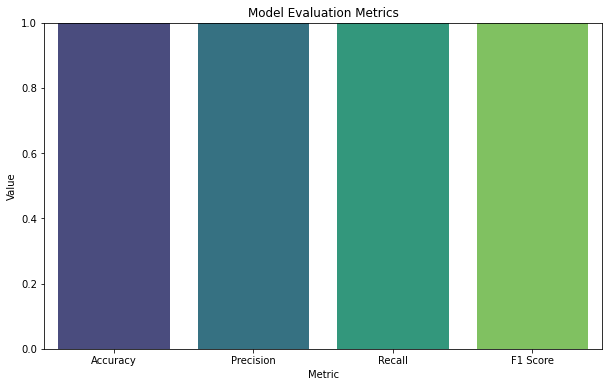

In [63]:
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # Set the y-axis limit to match the range of metric values (0 to 1 for percentages)
plt.show()